<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#FRI-and-FRII" data-toc-modified-id="FRI-and-FRII-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>FRI and FRII</a></span></li><li><span><a href="#GLEAM" data-toc-modified-id="GLEAM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>GLEAM</a></span></li><li><span><a href="#BAT" data-toc-modified-id="BAT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>BAT</a></span><ul class="toc-item"><li><span><a href="#70m_spectroscopy" data-toc-modified-id="70m_spectroscopy-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>70m_spectroscopy</a></span></li></ul></li><li><span><a href="#DR7" data-toc-modified-id="DR7-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DR7</a></span></li><li><span><a href="#3CR" data-toc-modified-id="3CR-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>3CR</a></span></li><li><span><a href="#TGSS" data-toc-modified-id="TGSS-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>TGSS</a></span></li><li><span><a href="#LoTSS" data-toc-modified-id="LoTSS-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>LoTSS</a></span></li><li><span><a href="#WISE_AGN" data-toc-modified-id="WISE_AGN-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>WISE_AGN</a></span></li><li><span><a href="#HerA" data-toc-modified-id="HerA-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>HerA</a></span><ul class="toc-item"><li><span><a href="#5GHz" data-toc-modified-id="5GHz-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>5GHz</a></span></li><li><span><a href="#178MHz" data-toc-modified-id="178MHz-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>178MHz</a></span></li></ul></li></ul></div>

# import

In [22]:
from astropy.io import fits
import time
#import urllib2# python2
import urllib#python3

import datetime
#from itertools import ifilter python2
from collections import Counter, defaultdict
import xml.etree.ElementTree as ET
import h5py
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
#import bibtexparser
import astropy.coordinates as coord
from astropy import units as u
from astropy.coordinates import SkyCoord

pd.set_option('mode.chained_assignment','warn')

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import cm

import os
from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [2]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)

In [3]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

In [4]:
def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [5]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [6]:
from astropy.table import Table

# FRI and FRII

In [7]:
FRI_dir='/home/brettlv/Survey_fits/AGN/FRICAT A FIRST catalog of FR I radio galaxies/J_A+A_598_A49'
FRI_data_b1=Table.read('%s/tableb1.dat'%FRI_dir,readme='%s/ReadMe'%FRI_dir,format='ascii.cds')
FRI_data_b2=Table.read('%s/tableb2.dat'%FRI_dir,readme='%s/ReadMe'%FRI_dir,format='ascii.cds')

In [8]:
FRI_data_b1

---,SDSS,z,F1.4GHz,F[OIII],rmag,Dn,sigma*,Cr,logLr,logL[OIII],logMBH
,,,mJy,1e-20 W / m2,mag,,km / s,,[10-7W],[10-7W],dex(Msun)
str4,str19,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
SDSS,J002900.98-011341.7,0.083,282.8,158.5,14.637,1.76,321,3.33,40.86,40.46,9.0
SDSS,J003930.52-103218.6,0.129,23.7,1.9,15.996,1.97,238,3.14,40.19,38.94,8.4
SDSS,J004148.22-091703.1,0.053,53.0,25.6,15.23,2.01,255,3.01,39.72,39.26,8.6
SDSS,J004300.63-091346.3,0.076,148.4,40.7,15.437,1.96,244,3.32,40.5,39.79,8.5
SDSS,J004530.46-004746.9,0.147,12.4,15.1,16.266,2.02,287,3.08,40.03,39.97,8.8
SDSS,J011255.11-095040.6,0.124,81.7,20.8,16.026,1.84,220,2.99,40.69,39.95,8.3
SDSS,J013327.25-082416.4,0.149,218.8,31.9,16.076,2.01,331,3.35,41.29,40.31,9.0
SDSS,J013412.78-010729.4,0.079,119.6,39.6,15.152,2.03,262,3.55,40.44,39.81,8.6


In [9]:
FRI_data_b2

---,SDSS,z,F1.4GHz,F[OIII],rmag,Dn,sigma*,Cr,logLr,logL[OIII],logMBH
,,,mJy,1e-20 W / m2,mag,,km / s,,[10-7W],[10-7W],dex(Msun)
str4,str19,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
SDSS,J090100.09+103701.7,0.029,63.3,162.2,13.254,1.96,250,3.46,39.27,39.54,8.5
SDSS,J092122.11+545153.9,0.045,36.6,50.5,14.217,1.95,253,3.35,39.41,39.4,8.5
SDSS,J092151.48+332406.5,0.024,117.3,109.4,13.127,1.95,227,3.34,39.34,39.17,8.4
SDSS,J093957.34+164712.8,0.047,41.3,49.3,14.982,1.7,217,2.95,39.51,39.44,8.3
SDSS,J101623.01+601405.6,0.031,35.0,58.1,13.244,1.95,251,3.24,39.07,39.15,8.5
SDSS,J104740.48+385553.6,0.035,55.9,49.9,13.255,1.96,304,3.36,39.39,39.19,8.9
SDSS,J111125.21+265748.9,0.034,86.8,87.5,13.322,1.99,281,2.91,39.53,39.38,8.7
SDSS,J132451.44+362242.7,0.017,789.4,394.5,12.662,2.01,242,3.32,39.91,39.46,8.5


In [10]:
FRII_dir='/home/brettlv/Survey_fits/AGN/FRIICAT A FIRST catalog of FR II radio galaxies/J_A+A_601_A81/'
FRII_data_1=Table.read('%s/table1.dat'%FRII_dir,readme='%s/ReadMe'%FRII_dir,format='ascii.cds')

In [11]:
FRII_data_1

---,SDSS,z,S1.4GHz,F[OIII],rmag,Dn4000,sigma,Cr,lognuLr,logL[OIII],logMBH,Class
,,,mJy,1e-20 W / m2,mag,,km / s,,[10-7W],[10-7W],dex(Msun),
str4,str19,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,str3
SDSS,J001247.57+004715.8,0.148,58.6,11.5,16.352,2.07,263,2.99,40.72,39.86,8.6,LEG
SDSS,J002107.62-005531.4,0.108,111.9,3.3,15.351,1.99,250,3.17,40.7,39.02,8.5,LEG
SDSS,J004326.80-105421.8,0.127,82.3,176.6,15.834,1.92,247,2.92,40.72,40.9,8.5,LEG
SDSS,J004404.66+010152.9,0.112,366.0,126.1,16.426,1.78,219,3.48,41.24,40.64,8.3,LEG
SDSS,J011830.65-104356.4,0.126,56.3,7.0,16.681,1.83,224,2.9,40.54,39.49,8.3,LEG
SDSS,J024558.54-064900.6,0.139,102.0,4.4,16.318,1.86,261,3.06,40.89,39.38,8.6,LEG
SDSS,J075221.83+333348.9,0.14,66.0,--,16.458,1.95,269,3.31,40.71,--,8.6,LEG
SDSS,J075529.95+520450.6,0.14,99.4,4.5,17.835,1.42,81,2.33,40.89,39.39,6.6,LEG


In [77]:
FRII_data_1.colnames

['---',
 'SDSS',
 'z',
 'S1.4GHz',
 'F[OIII]',
 'rmag',
 'Dn4000',
 'sigma',
 'Cr',
 'lognuLr',
 'logL[OIII]',
 'logMBH',
 'Class']

In [80]:
FRI_data_b2.colnames

['---',
 'SDSS',
 'z',
 'F1.4GHz',
 'F[OIII]',
 'rmag',
 'Dn',
 'sigma*',
 'Cr',
 'logLr',
 'logL[OIII]',
 'logMBH']

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


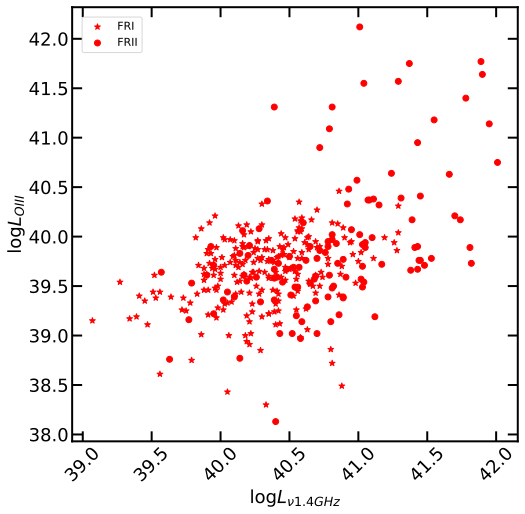

In [87]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

#ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',ec='red', fc='red',label='Type1',linestyle='-.')

#ax.axvline(np.mean(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),color='red',ls=':')

#FRI_data_b2

ax.scatter(FRI_data_b1['logLr'],FRI_data_b1['logL[OIII]'],color='red',marker='*',label='FRI')
ax.scatter(FRI_data_b2['logLr'],FRI_data_b2['logL[OIII]'],color='red',marker='*',label='FRI')

ax.scatter(FRII_data_1['lognuLr'],FRII_data_1['logL[OIII]'],color='red',marker='o',label='FRII')
#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'log$L_{\nu 1.4GHz}$')
ax.set_ylabel(r'log$L_{OIII}$')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars

#hdl = [h[0] for h in handles]
hdl=handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(0.0,0.6)
#plt.legend()


#fig.savefig('', dpi=400, transparent=False, bbox_inches='tight')


# GLEAM

In [94]:
gleam=fits.open('/home/brettlv/Survey_fits/GLEAM/GLEAM_EGC_v2.fits')
gleamdata=gleam[1].data

# BAT

## 70m_spectroscopy

FileName      Lrecl  Records   Explanations
ReadMe            80        .   This file
table2.dat       122      641   Optical spectra
table4.dat        87      641  *Stellar velocity dispersion measurements
table5.dat       117      641  *Emission line measurements -
                                 [OII]3727 spectral region
table6.dat        61      641  *Emission line measurements -
                                 narrow Hbeta spectral region
table7.dat        84      641  *Emission line measurements -
                                 narrow Halpha spectral region
table8.dat       123      641  *Strong emission line classification
table9.dat       102      302   Properties derived from spectral decomposition
                                 of broad Hbeta and broad Halpha sources
table10.dat       74       18   Properties derived from spectral decomposition
                                 of high redshift sources

Note on table4.dat, table5.dat, table6.dat, table7.dat, table8.dat:
 Source #250 has been excluded from the final table:
 its spectrum was actually that of a star rather than an AGN.

In [82]:
p70m_spectroscopy_dir='/home/brettlv/Survey_fits/BAT/BAT_70m_spectroscopic/J_ApJ_850_74'


In [83]:
p70m_spectroscopy_data_2=Table.read('%s/table2.dat'%p70m_spectroscopy_dir,readme='%s/ReadMe'%p70m_spectroscopy_dir,format='ascii.cds')


p70m_spectroscopy_data_4=Table.read('%s/table4.dat'%p70m_spectroscopy_dir,readme='%s/ReadMe'%p70m_spectroscopy_dir,format='ascii.cds')

p70m_spectroscopy_data_5=Table.read('%s/table5.dat'%p70m_spectroscopy_dir,readme='%s/ReadMe'%p70m_spectroscopy_dir,format='ascii.cds')

p70m_spectroscopy_data_6=Table.read('%s/table6.dat'%p70m_spectroscopy_dir,readme='%s/ReadMe'%p70m_spectroscopy_dir,format='ascii.cds')

p70m_spectroscopy_data_7=Table.read('%s/table7.dat'%p70m_spectroscopy_dir,readme='%s/ReadMe'%p70m_spectroscopy_dir,format='ascii.cds')


p70m_spectroscopy_data_8=Table.read('%s/table8.dat'%p70m_spectroscopy_dir,readme='%s/ReadMe'%p70m_spectroscopy_dir,format='ascii.cds')


p70m_spectroscopy_data_9=Table.read('%s/table9.dat'%p70m_spectroscopy_dir,readme='%s/ReadMe'%p70m_spectroscopy_dir,format='ascii.cds')


p70m_spectroscopy_data_10=Table.read('%s/table10.dat'%p70m_spectroscopy_dir,readme='%s/ReadMe'%p70m_spectroscopy_dir,format='ascii.cds')


# DR7

In [55]:
DR7_dir='/home/brettlv/Survey_fits/AGN/QSO properties from SDSS-DR7/J_ApJS_194_45'
DR7_data_1=Table.read('%s/catalog.dat'%DR7_dir,readme='%s/ReadMe'%DR7_dir,format='ascii.cds')

In [56]:
DR7_data_1.colnames

['SDSS',
 'RAdeg',
 'DEdeg',
 'z',
 'Plate',
 'Fiber',
 'MJD',
 'Flag',
 'N',
 'Uni',
 'iMAG',
 'logLbol',
 'e_logLbol',
 'BAL',
 'FIRST',
 'F6cm',
 'logFnu',
 'RL',
 'logL5100',
 'e_logL5100',
 'logL3000',
 'e_logL3000',
 'logL1350',
 'e_logL1350',
 'logLBHa',
 'e_logLBHa',
 'W(BHa)',
 'e_W(BHa)',
 'EWBHa',
 'e_EWBHa',
 'logLNHa',
 'e_logLNHa',
 'W(NHa)',
 'e_W(NHa)',
 'EWNHa',
 'e_EWNHa',
 'logLNII',
 'e_logLNII',
 'EWNII',
 'e_EWNII',
 'logLSII1',
 'e_logLSII1',
 'EWSII1',
 'e_EWSII1',
 'logLSII3',
 'e_logLSII3',
 'EWSII3',
 'e_EWSII3',
 'EWFeHa',
 'e_EWFeHa',
 'alpHa',
 'e_alpHa',
 'NpHa',
 'SN(Ha)',
 'chi2Ha',
 'logLBHb',
 'e_logLBHb',
 'W(BHb)',
 'e_W(BHb)',
 'EWBHb',
 'e_EWBHb',
 'logLNHb',
 'e_logLNHb',
 'W(NHb)',
 'e_W(NHb)',
 'EWNHb',
 'e_EWNHb',
 'W(NHb)g',
 'logLOIII4',
 'e_logLOIII4',
 'EWOIII4',
 'e_EWOIII4',
 'logLOIII5',
 'e_logLOIII5',
 'EWOIII5',
 'e_EWOIII5',
 'EWFeHb',
 'e_EWFeHb',
 'alpHb',
 'e_alpHb',
 'NpHb',
 'SN(Hb)',
 'chi2Hb',
 'logLMgII',
 'e_logLMgII',
 'W(

In [72]:
DR7_data_1['D_cm']=cosmo.luminosity_distance(z=DR7_data_1['z']).to(u.cm).value
DR7_data_1['L6cm']=DR7_data_1['F6cm']*4*np.pi*DR7_data_1['D_cm']**2*1.0e-26
DR7_data_1['logL6cm']=np.log10(DR7_data_1['L6cm'])

/home/brettlv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
DR7_data_1_6cm=DR7_data_1[DR7_data_1['F6cm']!=0]

In [75]:
DR7_data_1_6cm_OIII=DR7_data_1_6cm[DR7_data_1_6cm['logLOIII5']!=0]

In [76]:
DR7_data_1_6cm_OIII

SDSS,RAdeg,DEdeg,z,Plate,Fiber,MJD,Flag,N,Uni,iMAG,logLbol,e_logLbol,BAL,FIRST,F6cm,logFnu,RL,logL5100,e_logL5100,logL3000,e_logL3000,logL1350,e_logL1350,logLBHa,e_logLBHa,W(BHa),e_W(BHa),EWBHa,e_EWBHa,logLNHa,e_logLNHa,W(NHa),e_W(NHa),EWNHa,e_EWNHa,logLNII,e_logLNII,EWNII,e_EWNII,logLSII1,e_logLSII1,EWSII1,e_EWSII1,logLSII3,e_logLSII3,EWSII3,e_EWSII3,EWFeHa,e_EWFeHa,alpHa,e_alpHa,NpHa,SN(Ha),chi2Ha,logLBHb,e_logLBHb,W(BHb),e_W(BHb),EWBHb,e_EWBHb,logLNHb,e_logLNHb,W(NHb),e_W(NHb),EWNHb,e_EWNHb,W(NHb)g,logLOIII4,e_logLOIII4,EWOIII4,e_EWOIII4,logLOIII5,e_logLOIII5,EWOIII5,e_EWOIII5,EWFeHb,e_EWFeHb,alpHb,e_alpHb,NpHb,SN(Hb),chi2Hb,logLMgII,e_logLMgII,W(MgII),e_W(MgII),EWMgII,e_EWMgII,logLBMgII,e_logLBMgII,W(BMgII),e_W(BMgII),EWBMgII,e_EWBMgII,W(BMgII)g,FeMgII,e_FeMgII,alphMgII,e_alphMgII,NpMgII,SN(MgII),chi2MgII,logLCIV,e_logLCIV,W(CIV),e_W(CIV),EWCIV,e_EWCIV,alpCIV,e_alpCIV,NpCIV,SN(CIV),chi2CIV,V(BHa),e_V(BHa),V(NHa),e_V(NHa),V(BHb),e_V(BHb),V(NHb),e_V(NHb),V(BMgII),e_V(BMgII),V(CIVp),e_V(CIVp),logBHHM,e_logBHHM,logBHHV,e_logBHHV,logBHMM,e_logBHMM,logBHMV,e_logBHMV,logBHMS,e_logBHMS,logBHCV,e_logBHCV,logBH,e_logBH,logEdd,SpF,zHW,e_zHW,umag,gmag,rmag,imag,zmag,e_umag,e_gmag,e_rmag,e_imag,e_zmag,umag0,gmag0,rmag0,imag0,zmag0,Delg-i,logNH,CR,oRASS,Jmag,Hmag,Ksmag,e_Jmag,e_Hmag,e_Ksmag,o2M,W1mag,W2mag,W3mag,W4mag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,oWISE,D_cm,L6cm,logL6cm
,deg,deg,,,,,,,,mag,[10-7W],[10-7W],,,mJy,dex(Jy),,[10-7W],[10-7W],[10-7W],[10-7W],[10-7W],[10-7W],[10-7W],[10-7W],km / s,km / s,0.1 nm,0.1 nm,[10-7W],[10-7W],km / s,km / s,0.1 nm,0.1 nm,[10-7W],[10-7W],0.1 nm,0.1 nm,[10-7W],[10-7W],0.1 nm,0.1 nm,[10-7W],[10-7W],0.1 nm,0.1 nm,0.1 nm,0.1 nm,,,,,,[10-7W],[10-7W],km / s,km / s,0.1 nm,0.1 nm,[10-7W],[10-7W],km / s,km / s,0.1 nm,0.1 nm,km / s,[10-7W],[10-7W],0.1 nm,0.1 nm,[10-7W],[10-7W],0.1 nm,0.1 nm,0.1 nm,0.1 nm,,,,,,[10-7W],[10-7W],km / s,km / s,0.1 nm,0.1 nm,[10-7W],[10-7W],km / s,km / s,0.1 nm,0.1 nm,km / s,0.1 nm,0.1 nm,,,,,,[10-7W],[10-7W],km / s,km / s,0.1 nm,0.1 nm,,,,,,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(Msun),dex(---),,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,dex(1 / cm2),ct / s,arcsec,mag,mag,mag,mag,mag,mag,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,arcsec,,mJy,mJy
str18,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
000111.19-002011.5,0.29666,-0.33654,0.5179,387,161,51791,2097172,2,0,-24.1,45.666,0.007,0,2,37.455,-27.01,382.8,44.699,0.007,44.87,0.004,0.0,-1.0,0

Log Pcore L [O  III]
Lcore L  [O   III] 
P core [O III] FR
Pcore OIII FR


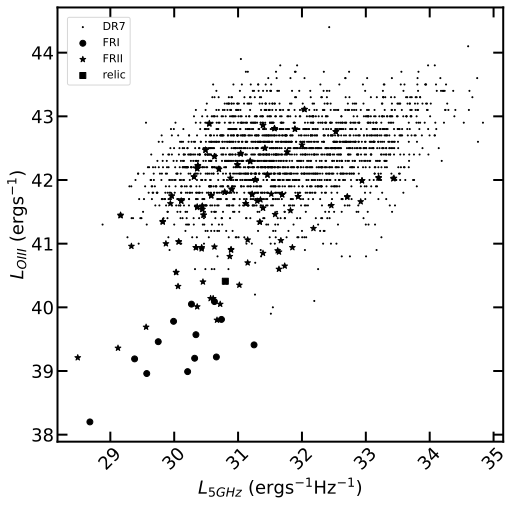

In [81]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

#ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',ec='red', fc='red',label='Type1',linestyle='-.')

#ax.axvline(np.mean(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),color='red',ls=':')


plotdata=DR7_data_1_6cm_OIII
label_x='logL6cm'
label_y='logLOIII5'

for i in range(len(plotdata)):
    if isinstance(plotdata[label_x][i],float) and isinstance(plotdata[label_y][i],float):
        ax.scatter(plotdata[label_x][i],
                   plotdata[label_y][i],
                   color='black',
                   s=5,
                   marker='.',label='DR7')


#p3CR
plotdata=p3CR_V
column_x=2
column_y=4
print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='*',label='FRII')

plotdata=p3CR_IV
column_x=3
column_y=2

print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='s',label='relic')
        
        
        
plotdata=p3CR_III
column_x=5
column_y=3
column_l=7
print(plotdata.columns[column_x],plotdata.columns[column_y],plotdata.columns[column_l])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        if plotdata[plotdata.columns[column_l]][i]==1:
            label='FRI'
            marker='o'
        elif plotdata[plotdata.columns[column_l]][i]==2:
            label='FRII'
            marker='*'
        else:
            label=''
            
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],                   
                   color='black',marker=marker,label=label)
plotdata=p3CR_II
column_x=5
column_y=3
column_l=7

print(plotdata.columns[column_x],plotdata.columns[column_y],plotdata.columns[column_l])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        if plotdata[plotdata.columns[column_l]][i]==1:
            label='FRI'
            marker='o'
        elif plotdata[plotdata.columns[column_l]][i]==2:
            label='FRII'
            marker='*'
        else:
            label=''            
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],                   
                   color='black',marker=marker,label=label)

        
#ax.scatter(np.log10(L_HerA_178MHz_total),np.log10(L_HerA_OIII),color='red',marker='*',label='HerA tot')
#ax.scatter(np.log10(L_HerA_5GHz),np.log10(L_HerA_OIII),color='red',marker='o',label='HerA core')
#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'$L_{OIII}$ ($\mathrm{erg s^{-1}} $)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(0.0,0.6)
#plt.legend()

#fig.savefig('', dpi=400, transparent=False, bbox_inches='tight')


# 3CR

p3CR_V=pd.read_excel('/home/brettlv/Documents/3CR.xlsx',sheet_name='工作表1')

p3CR_IV=pd.read_excel('/home/brettlv/Documents/3CR.xlsx',sheet_name='工作表2')

p3CR_III=pd.read_excel('/home/brettlv/Documents/3CR.xlsx',sheet_name='工作表3')

p3CR_II=pd.read_excel('/home/brettlv/Documents/3CR.xlsx',sheet_name='工作表4')

In [9]:
p3CR_V=pd.read_excel('/Users/brettlv/Downloads/mwa/sources_candidate//3CR.xlsx',sheet_name='工作表1')

p3CR_IV=pd.read_excel('/Users/brettlv/Downloads/mwa/sources_candidate//3CR.xlsx',sheet_name='工作表2')

p3CR_III=pd.read_excel('/Users/brettlv/Downloads/mwa/sources_candidate/3CR.xlsx',sheet_name='工作表3')

p3CR_II=pd.read_excel('/Users/brettlv/Downloads/mwa/sources_candidate/3CR.xlsx',sheet_name='工作表4')

p3CR_III

In [18]:
p3CR_II

,Name,redshift,Haloha,OIII,L178,Pcore,Mh,FR,spec,method,IItable2
0,3C 015,0.0730,40.4,40.6,33.30,31.64,-25.29,,LEG,EI,NaN
1,3C 017,0.2198,41.88,41.99,34.44,32.94,-24.81*,2,BLO,EI,NaN
2,3C 018,0.1880,41.93,42.55,34.27,32,-,2,BLO,EI,NaN
3,3C 020,0.1740,no obs.,NaN,34.55,30.44,-24.64*,2,no obs.,NaN,NaN
4,3C 028,0.1952,41.51,40.96,34.24,29.33,-,,ELEG,EI,NaN
...,...,...,...,...,...,...,...,...,...,...,...
107,3C 456,0.2330,42.48,42.81,34.23,31.57,-,2,HEG,EI,NaN
108,3C 458,0.2890,no obs.,NaN,34.58,30.88,-,2,no obs.,NaN,NaN
109,3C 459,0.2199,42.17,42.03,34.55,33.2,-25.34*,2,BLO,EI,NaN
110,3C 460,0.2680,42.09,41.78,34.25,31.52,-,2,LEG,EI,NaN


# TGSS

In [86]:
TGSS_dir='/home/brettlv/Survey_fits/TGSS ADR1 The GMRT 150MHz all-sky radio survey/J_A+A_598_A78'
TGSS_data_1=Table.read('%s/table3.dat'%TGSS_dir,readme='%s/ReadMe'%TGSS_dir,format='ascii.cds')

In [87]:
TGSS_data_1.columns

<TableColumns names=('TGSSADR','RAdeg','e_RAdeg','DEdeg','e_DEdeg','Stotal','e_Stotal','Speak','e_Speak','Maj','e_Maj','Min','e_Min','PA','e_PA','Noise','Code','Mosaic')>

# LoTSS

In [84]:
LoTSS_dir='/home/brettlv/Survey_fits/LOFAR Two-metre Sky Survey (LoTSS) DR2/J_A+A_659_A1'
LoTSS_data_1=Table.read('%s/catalog.dat'%LoTSS_dir,readme='%s/ReadMe'%LoTSS_dir,format='ascii.cds')

In [89]:
LoTSS_data_1.columns

<TableColumns names=('Source','RAdeg','e_RAdeg','DEdeg','e_DEdeg','Speak','e_Speak','SpeakTot','e_SpeakTot','Maj','e_Maj','Min','e_Min','DCMaj','e_DCMaj','DCMin','e_DCMin','PA','e_PA','DCPA','e_DCPA','Islrms','SCode','Mosaic','Npoint','MaskFract')>

# WISE_AGN

In [93]:
WISE_AGN_cat=fits.open('/home/brettlv/Survey_fits/AGN/The WISE AGN candidates catalogs/J_ApJS_234_23_r90cat.dat.gz.fits')

# HerA

The total flux of Her A is 10.3 ± 0.3 Jy and the core
flux is 8.8 ± 0.1 mJy at 5 GHz.

D_HerA=cosmo.luminosity_distance(z=0.154).to(u.cm)

D_HerA.value

L_HerA_5GHz=  4*np.pi*D_HerA.value**2*8.8*1.0e-26

L_HerA_5GHz

L_HerA_178MHz=  (178.0/5000)**(-1.3)*L_HerA_5GHz

np.log10(L_HerA_178MHz)

In [10]:
D_HerA=cosmo.luminosity_distance(z=0.154).to(u.cm)

In [11]:
L_HerA_5GHz=  4*np.pi*D_HerA.value**2*8.8*1.0e-26

In [12]:
L_HerA_151MHz_core=  (151.0/5000)**(-1.3)*L_HerA_5GHz

L_HerA_178MHz_core=  (178.0/5000)**(-1.3)*L_HerA_5GHz

In [13]:
L_HerA_178MHz_core,L_HerA_151MHz_core,

(4.3643486043293526e+32, 5.404996341058931e+32)

In [14]:
np.log10(L_HerA_178MHz_core),np.log10(L_HerA_151MHz_core)

(32.63991943277102, 32.732795404291466)

In [15]:
L_HerA_178MHz_total= 4*np.pi*D_HerA.value**2*351.0*1.0e-23

In [16]:
L_HerA_151MHz_total= (151/178)**(-1.3)*L_HerA_178MHz_total

In [17]:
L_HerA_178MHz_total,L_HerA_151MHz_total

(2.278394242263891e+35, 2.8216610677502028e+35)

In [18]:
L_HerA_OIII=1.0e44/3500

FRI_data_b1.colnames

In [45]:
TGSS_data_1.colnames

['TGSSADR',
 'RAdeg',
 'e_RAdeg',
 'DEdeg',
 'e_DEdeg',
 'Stotal',
 'e_Stotal',
 'Speak',
 'e_Speak',
 'Maj',
 'e_Maj',
 'Min',
 'e_Min',
 'PA',
 'e_PA',
 'Noise',
 'Code',
 'Mosaic']

In [20]:
def plot_LOIII_L151_data(data,name1_label,name2_label,flux_label):   
    for i in range(len(data)):
        LOIII=data['logL[OIII]'][i]
        name=data[name1_label][i].strip()
        z=data['z'][i]
        d_cm=cosmo.luminosity_distance(z).to(u.cm).value
        
        TGSS=TGSS_data_1[TGSS_data_1[name2_label]==name]
        TGSS_F151MHz=TGSS[flux_label]
        TGSS_L151MHz=  4*np.pi*d_cm**2*TGSS_F151MHz*1.0e-23
        
        if TGSS_L151MHz:
            ax.scatter(TGSS_L151MHz,LOIII)

In [104]:
p3CR.columns

Index(['Name', 'z', 'Log Pcore', 'Log L178', 'L [O  III]', 'Log L[OII]',
       'Log L[OI]', 'Class'],
      dtype='object')

p3CR

In [51]:
p3CR_V.columns

Index(['Name', 'z', 'Log Pcore', 'Log L178', 'L [O  III]', 'Log L[OII]',
       'Log L[OI]', 'Class', 'Vtable1FRII'],
      dtype='object')

In [52]:
p3CR_IV.columns

Index(['Name', 'z', 'L  [O   III] ', 'Lcore', 'L178'], dtype='object')

In [53]:
p3CR_III.columns

Index(['Name', 'redshift', 'Hα', '[O III]', 'L 178', 'P core', 'M H', 'FR',
       'spec', 'Method', 'IIItable3'],
      dtype='object')

## 5GHz

Log Pcore L [O  III]
Lcore L  [O   III] 
P core [O III] FR
Pcore OIII FR


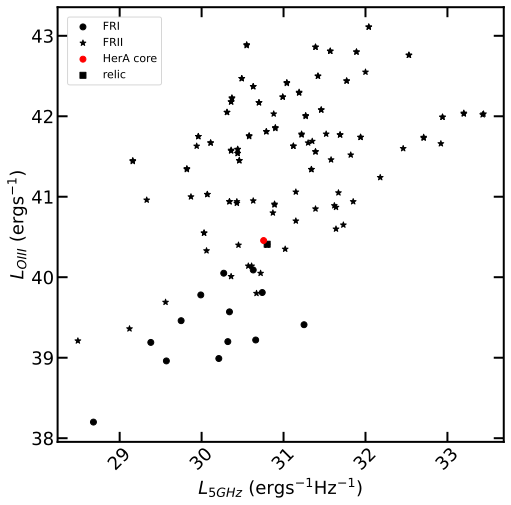

In [54]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

#ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',ec='red', fc='red',label='Type1',linestyle='-.')

#ax.axvline(np.mean(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),color='red',ls=':')


#p3CR
plotdata=p3CR_V
column_x=2
column_y=4
print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='*',label='FRII')

plotdata=p3CR_IV
column_x=3
column_y=2

print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='s',label='relic')
        
        
        
plotdata=p3CR_III
column_x=5
column_y=3
column_l=7
print(plotdata.columns[column_x],plotdata.columns[column_y],plotdata.columns[column_l])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        if plotdata[plotdata.columns[column_l]][i]==1:
            label='FRI'
            marker='o'
        elif plotdata[plotdata.columns[column_l]][i]==2:
            label='FRII'
            marker='*'
        else:
            label=''
            
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],                   
                   color='black',marker=marker,label=label)
plotdata=p3CR_II
column_x=5
column_y=3
column_l=7

print(plotdata.columns[column_x],plotdata.columns[column_y],plotdata.columns[column_l])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        if plotdata[plotdata.columns[column_l]][i]==1:
            label='FRI'
            marker='o'
        elif plotdata[plotdata.columns[column_l]][i]==2:
            label='FRII'
            marker='*'
        else:
            label=''            
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],                   
                   color='black',marker=marker,label=label)

        
#ax.scatter(np.log10(L_HerA_178MHz_total),np.log10(L_HerA_OIII),color='red',marker='*',label='HerA tot')
ax.scatter(np.log10(L_HerA_5GHz),np.log10(L_HerA_OIII),color='red',marker='o',label='HerA core')
#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'$L_{OIII}$ ($\mathrm{erg s^{-1}} $)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(0.0,0.6)
#plt.legend()


#fig.savefig('', dpi=400, transparent=False, bbox_inches='tight')


## 178MHz

In [36]:
p3CR_V.columns

Index(['Name', 'z', 'Log Pcore', 'Log L178', 'L [O  III]', 'Log L[OII]',
       'Log L[OI]', 'Class', 'Vtable1FRII'],
      dtype='object')

In [37]:
p3CR_IV.columns

Index(['Name', 'z', 'L  [O   III] ', 'Lcore', 'L178'], dtype='object')

In [38]:
p3CR_III

,Name,redshift,Hα,[O III],L 178,P core,M H,FR,spec,Method,IIItable3
0,3C 020,0.174,41.37,41.54,34.55,30.44,–24.64∗,2.0,HEG,E.I.,NaN
1,3C 063,0.175,41.54,41.63,34.21,31.12,–,NaN,HEG,E.I.,NaN
2,3C 132,0.214,41.37,41.46,34.25,31.58,–26.00,2.0,LEG,D.D.,NaN
3,3C 270,0.007,39.26,38.96,31.79,29.57,–25.01,1.0,LEG,E.I.,NaN
4,3C 288,0.246,40.86,40.65,34.53,31.73,–26.10∗,2.0,LEG,E.I.,NaN
5,3C 346,0.161,–,41.24,33.88,32.18,–25.84,2.0,–,NaN,NaN
6,3C 349,0.205,41.5,41.69,34.20,31.35,–24.82∗,2.0,LEG,E.I.,NaN
7,3C 403.1,0.055,39.99,39.86,32.98,–,–24.36,NaN,LEG,E.I.,NaN
8,3C 410,0.248,41.86,42.02,34.80,33.43,–,2.0,BLO,E.I.,NaN
9,3C 458,0.289,41.58,42.03,34.58,30.88,–,2.0,HEG,E.I.,NaN


In [40]:
p3CR_II.columns

Index(['Name', 'redshift', 'Haloha', 'OIII', 'L178', 'Pcore', 'Mh', 'FR',
       'spec', 'method', 'IItable2'],
      dtype='object')

Log L178 L [O  III]
L178 L  [O   III] 
L 178 [O III] FR
L178 OIII FR


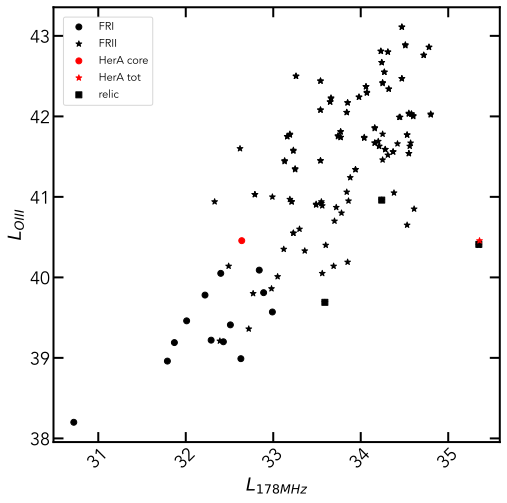

In [24]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

#ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',ec='red', fc='red',label='Type1',linestyle='-.')

#ax.axvline(np.mean(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),color='red',ls=':')


        

#p3CR
plotdata=p3CR_V
column_x=3
column_y=4
print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='*',label='FRII')

plotdata=p3CR_IV
column_x=4
column_y=2

print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='s',label='relic')
        
        
        
plotdata=p3CR_III
column_x=4
column_y=3
column_l=7
print(plotdata.columns[column_x],plotdata.columns[column_y],plotdata.columns[column_l])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        if plotdata[plotdata.columns[column_l]][i]==1:
            label='FRI'
            marker='o'
        elif plotdata[plotdata.columns[column_l]][i]==2:
            label='FRII'
            marker='*'
        else:
            label=''
            
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],                   
                   color='black',marker=marker,label=label)
plotdata=p3CR_II
column_x=4
column_y=3
column_l=7

print(plotdata.columns[column_x],plotdata.columns[column_y],plotdata.columns[column_l])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        if plotdata[plotdata.columns[column_l]][i]==1:
            label='FRI'
            marker='o'
        elif plotdata[plotdata.columns[column_l]][i]==2:
            label='FRII'
            marker='*'
        else:
            label=''            
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],                   
                   color='black',marker=marker,label=label)
    
        
            
ax.scatter(np.log10(L_HerA_178MHz_total),np.log10(L_HerA_OIII),color='red',marker='*',label='HerA tot')
ax.scatter(np.log10(L_HerA_178MHz_core),np.log10(L_HerA_OIII),color='red',marker='o',label='HerA core')
#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$L_{178MHz}$')
ax.set_ylabel(r'$L_{OIII}$')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(0.0,0.6)
#plt.legend()


#fig.savefig('', dpi=400, transparent=False, bbox_inches='tight')


In [46]:
p3CR_II.columns

Index(['Name', 'redshift', 'Haloha', 'OIII', 'L178', 'Pcore', 'Mh', 'FR',
       'spec', 'method', 'IItable2'],
      dtype='object')